Time Series Analysis and Modeling with R

Automated Forecasting

auto.arima() can handle both seasonal and nonseasonal ARIMA models

ets() can support both additive and multiplicative models


ARIMA modeling 
1. Perform exploratory data analysis

2. Decomposition of data

3. Test the stationarity

4. Fit model (auto.arima())

5. Calculate forecasts

Other models:
1. The multiplicative model: Y[t]=T[t]∗S[t]∗e[t]

2. Exponential model (HoltWinters() and ets())

In [1]:
#load R packages
library(tseries)
library(forecast)
library(ggplot2)
library(ggfortify)

In [2]:
#load data
data(AirPassengers)
AP <- AirPassengers

In [3]:
#Check for missing values
sum(is.na(AP))

[1] 0

In [4]:
#check the class
class(AP)

[1] "ts"

In [5]:
#check the start
start(AP)

[1] 1949    1

In [6]:
#check the end
end(AP)

[1] 1960   12

In [7]:
#check the frequency
frequency(AP)

[1] 12

In [8]:
#have a look at the summary of the data
summary(AP)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.0   180.0   265.5   280.3   360.5   622.0 

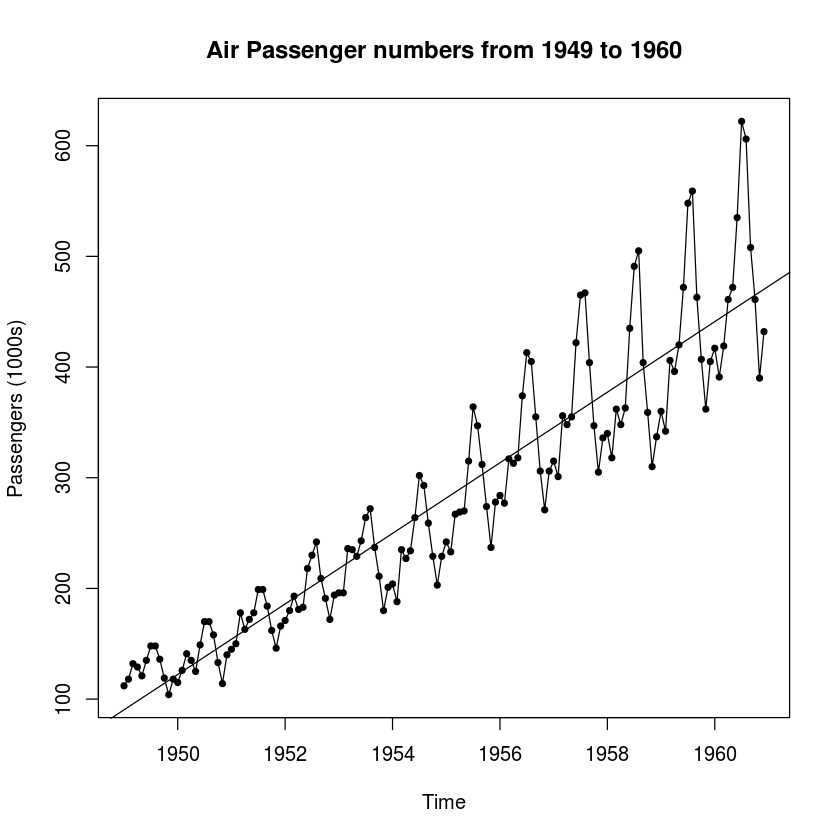

In [9]:
#plot the time series data
plot(AP, ylab="Passengers (1000s)", main="Air Passenger numbers from 1949 to 1960", type="o", pch=20)
abline(reg = lm(AP ~ time(AP)))

In [10]:
#check the cycle
cycle(AP)

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949   1   2   3   4   5   6   7   8   9  10  11  12
1950   1   2   3   4   5   6   7   8   9  10  11  12
1951   1   2   3   4   5   6   7   8   9  10  11  12
1952   1   2   3   4   5   6   7   8   9  10  11  12
1953   1   2   3   4   5   6   7   8   9  10  11  12
1954   1   2   3   4   5   6   7   8   9  10  11  12
1955   1   2   3   4   5   6   7   8   9  10  11  12
1956   1   2   3   4   5   6   7   8   9  10  11  12
1957   1   2   3   4   5   6   7   8   9  10  11  12
1958   1   2   3   4   5   6   7   8   9  10  11  12
1959   1   2   3   4   5   6   7   8   9  10  11  12
1960   1   2   3   4   5   6   7   8   9  10  11  12

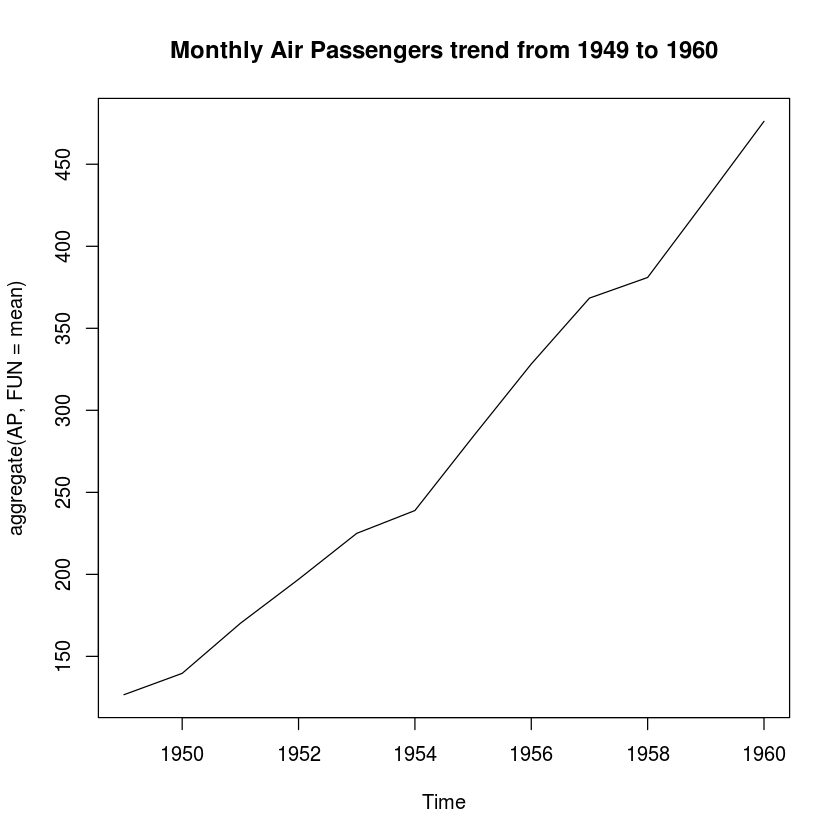

In [11]:
#plot the trend
plot(aggregate(AP, FUN=mean), main ="Monthly Air Passengers trend from 1949 to 1960")

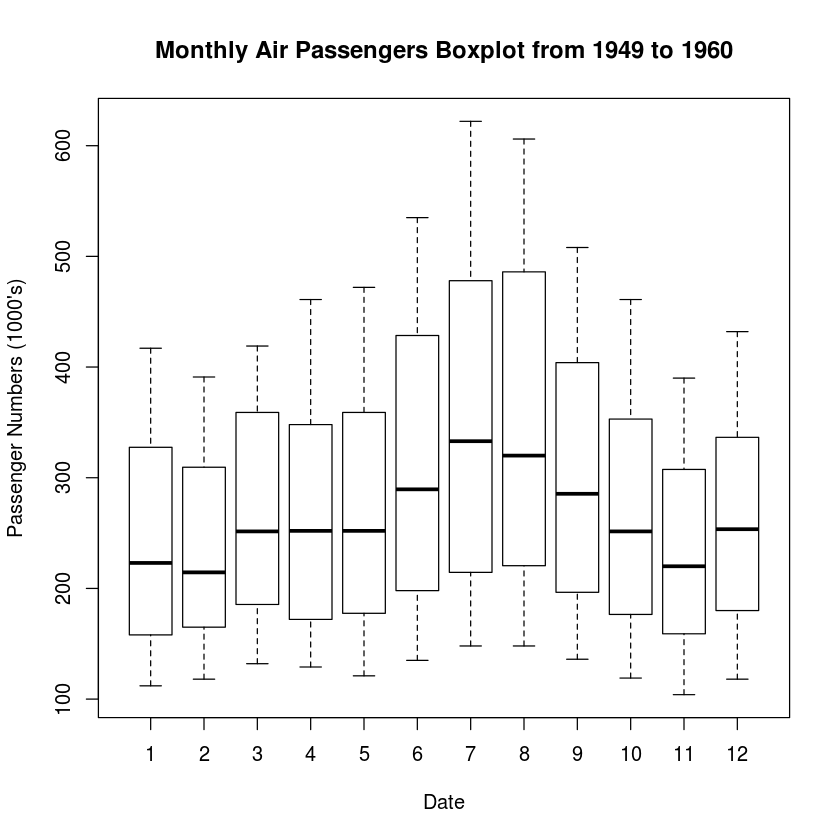

In [12]:
#Boxplot
boxplot(AP~cycle(AP), xlab="Date", ylab = "Passenger Numbers (1000's)", main ="Monthly Air Passengers Boxplot from 1949 to 1960")

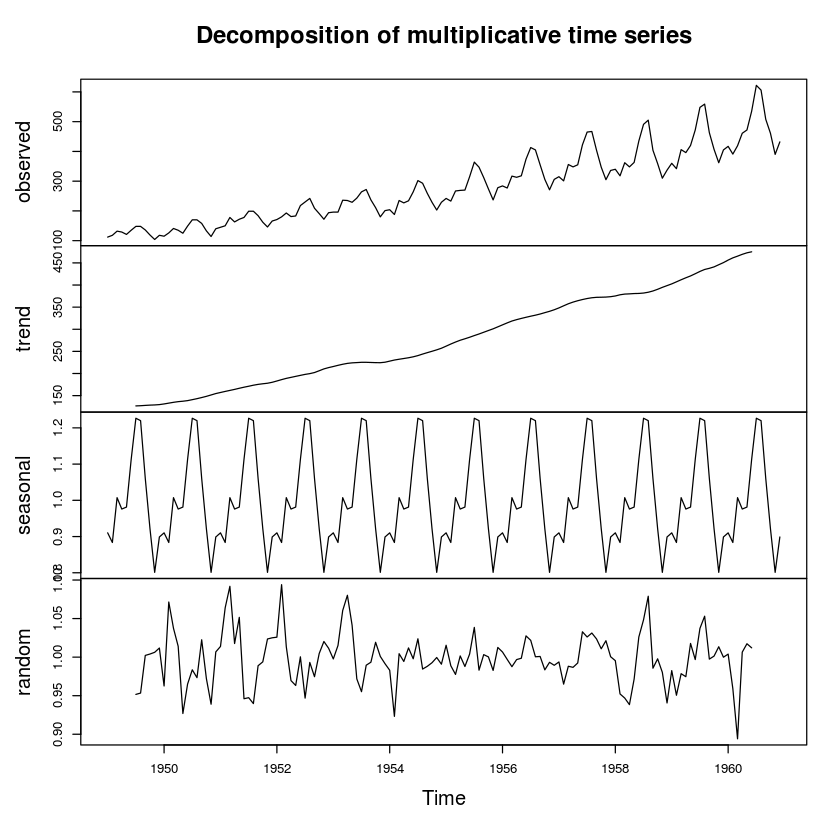

In [13]:
#TIME SERIES DECOMPOSITION
#decompose the time series for estimates of trend, seasonal, and random components using moving average method
#The multiplicative model is: Y[t]=T[t]∗S[t]∗e[t]
#Y(t) is the number of passengers at time t,
#T(t) is the trend component at time t,
#S(t) is the seasonal component at time t,
#e(t) is the random error component at time t.
AP.decompM <- decompose(AP, type = "multiplicative")
plot(AP.decompM)

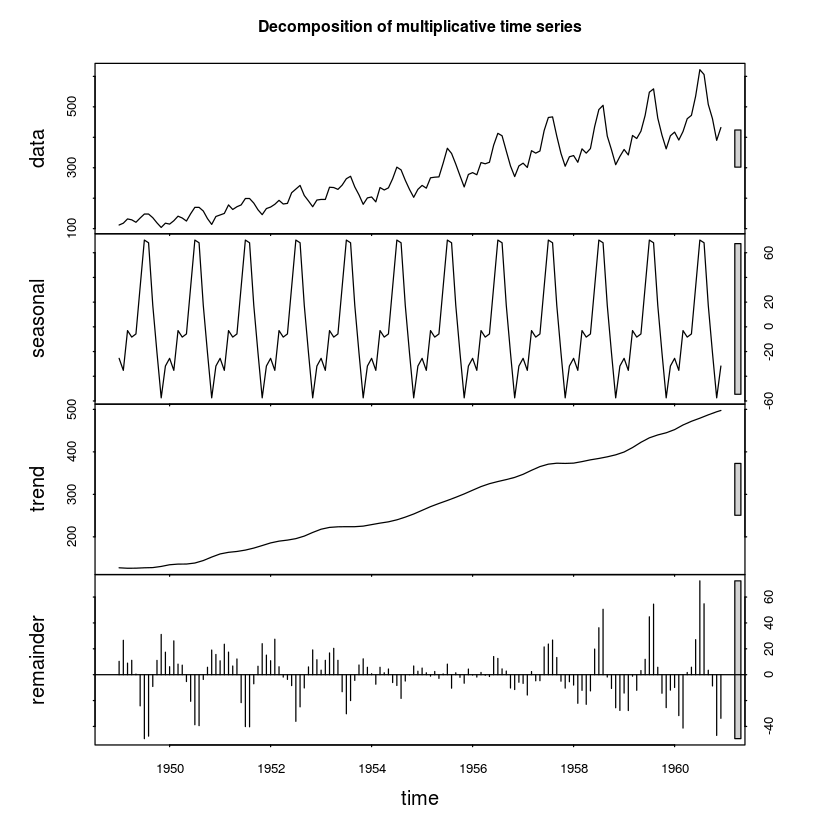

In [14]:
fit <- stl(AP, s.window="period")
plot(fit, main="Decomposition of multiplicative time series")

In [15]:
#TEST STATIONARITY OF THE TIME SERIES
#Test stationarity of the time series (ADF)
#First set the hypothesis test:
#The null hypothesis H0: that the time series is non stationary
#The alternative hypothesis HA : that the time series is stationary

adf.test(AP) 

Warning message in adf.test(AP):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  AP
Dickey-Fuller = -7.3186, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


In [16]:
adf.test(diff(log(AP)), alternative="stationary", k=0)

Warning message in adf.test(diff(log(AP)), alternative = "stationary", k = 0):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  diff(log(AP))
Dickey-Fuller = -9.6003, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


The p-value is less than 5%, so the null hypothesis is rejected. As per the test results above, the p-value is 0.01 which is <0.05, therefore we reject the null in favour of the alternative hypothesis that the time series is stationary.

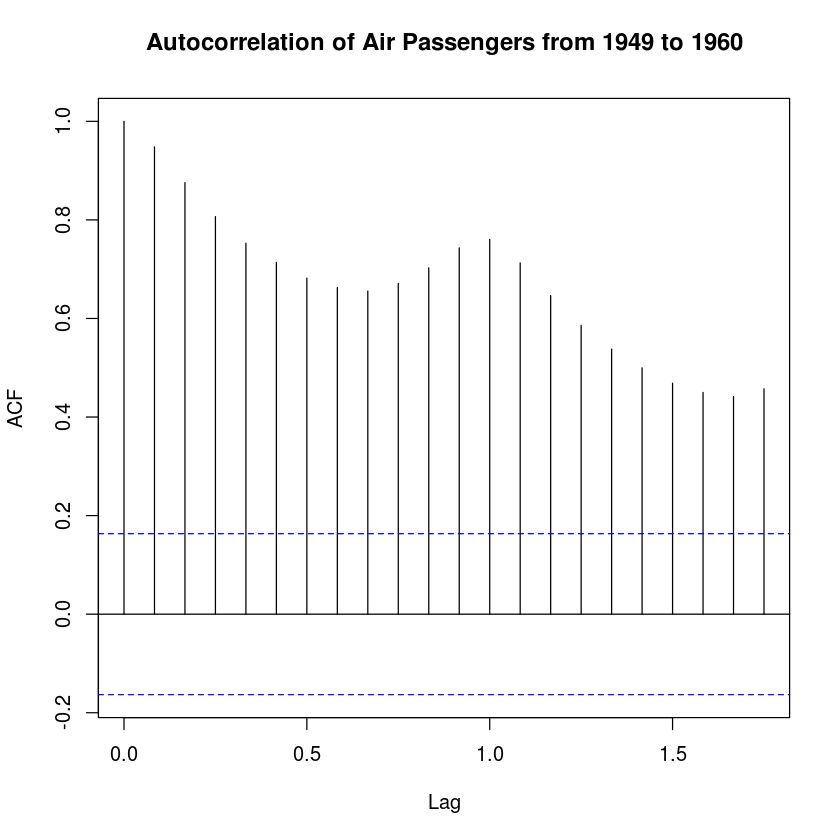

In [17]:
#Test stationarity of the time series (Autocorrelation)
#autocorrelation function (acf) plots the correlation between a series and its lags ie previous observations with a 95% confidence interval in blue
#If the autocorrelation crosses the dashed blue line, it means that specific lag is significantly correlated with current series.
acf(AP,plot=TRUE,main="Autocorrelation of Air Passengers from 1949 to 1960") 

The maximum at lag 1 or 12 months, indicates a positive relationship with the 12 month cycle.

In [18]:
# Review random time series for any missing values
AP.decompM$random

           Jan       Feb       Mar       Apr       May       Jun       Jul
1949        NA        NA        NA        NA        NA        NA 0.9516643
1950 0.9626030 1.0714668 1.0374474 1.0140476 0.9269030 0.9650406 0.9835566
1951 1.0138446 1.0640180 1.0918541 1.0176651 1.0515825 0.9460444 0.9474041
1952 1.0258814 1.0939696 1.0134734 0.9695596 0.9632673 1.0003735 0.9468562
1953 0.9976684 1.0151646 1.0604644 1.0802327 1.0413329 0.9718056 0.9551933
1954 0.9829785 0.9232032 1.0044417 0.9943899 1.0119479 0.9978740 1.0237753
1955 1.0154046 0.9888241 0.9775844 1.0015732 0.9878755 1.0039635 1.0385512
1956 1.0066157 0.9970250 0.9876248 0.9968224 0.9985644 1.0275560 1.0217685
1957 0.9937293 0.9649918 0.9881769 0.9867637 0.9924177 1.0328601 1.0261250
1958 0.9954212 0.9522762 0.9469115 0.9383993 0.9715785 1.0261340 1.0483841
1959 0.9825176 0.9505736 0.9785278 0.9746440 1.0177637 0.9968613 1.0373136
1960 1.0039279 0.9590794 0.8940857 1.0064948 1.0173588 1.0120790        NA
           Aug       Sep 

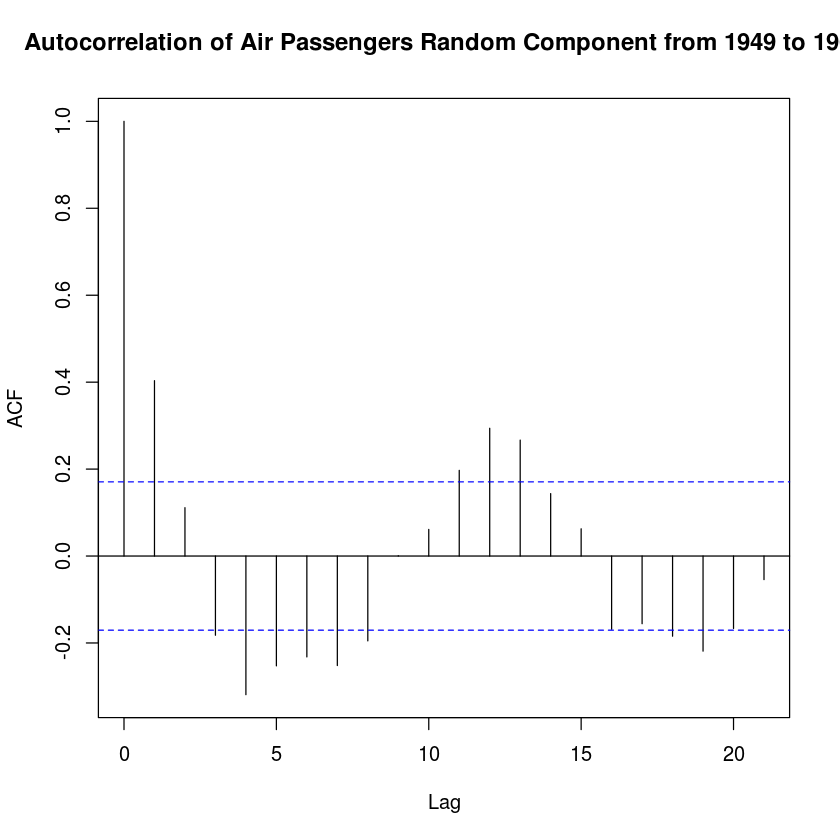

In [19]:
#plot the random time series from 7:138 which exclude the NA values
acf(AP.decompM$random[7:138],plot=TRUE, main="Autocorrelation of Air Passengers Random Component from 1949 to 1960") 

The acf of the residuals is centered around 0.

In [20]:
#Model Fitting
#ARIMA Model
#Use the auto.arima function from the forecast R package
#to fit the best model and coefficients, given the default parameters including seasonality as TRUE.

arimaAP <- auto.arima(AP)
arimaAP

Series: AP 
ARIMA(2,1,1)(0,1,0)[12] 

Coefficients:
         ar1     ar2      ma1
      0.5960  0.2143  -0.9819
s.e.  0.0888  0.0880   0.0292

sigma^2 estimated as 132.3:  log likelihood=-504.92
AIC=1017.85   AICc=1018.17   BIC=1029.35

The ARIMA(2,1,1)(0,1,0)[12] model parameters are lag 1 differencing (d), an autoregressive term of second lag (p) and a moving average model of order 1 (q). Then the seasonal model has an autoregressive term of first lag (D) at model period 12 units, in this case months.

The ARIMA fitted model is:

Y^=0.5960Yt−2+0.2143Yt−12−0.9819et−1+E

where E is some error.

The ggtsdiag function from ggfortify R package performs model diagnostics of the residuals and the acf. will include a autocovariance plot.

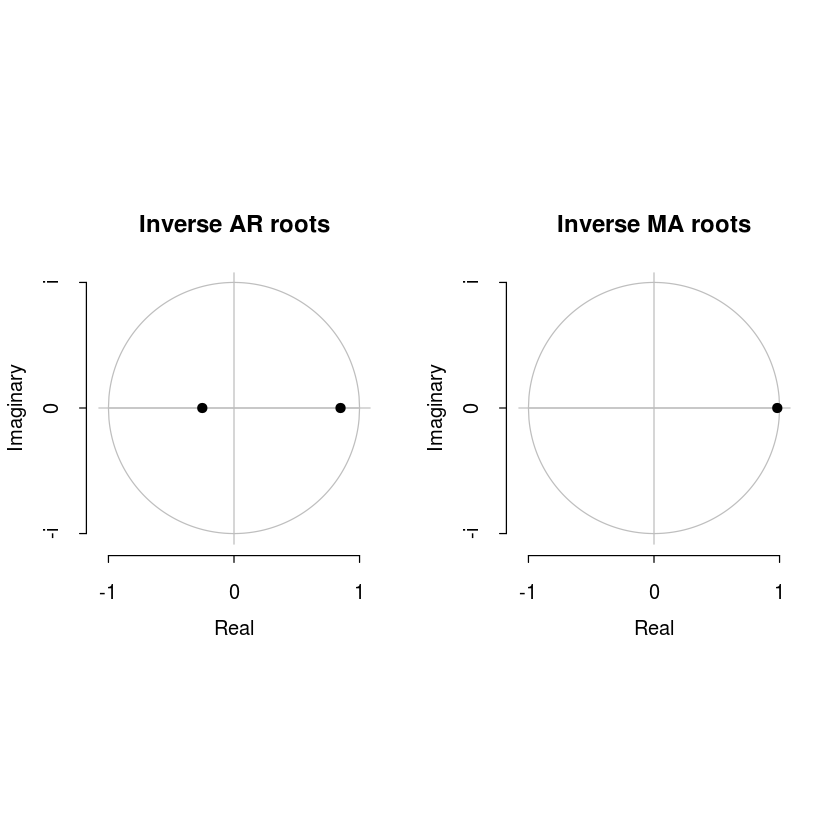

In [21]:
plot(arimaAP)

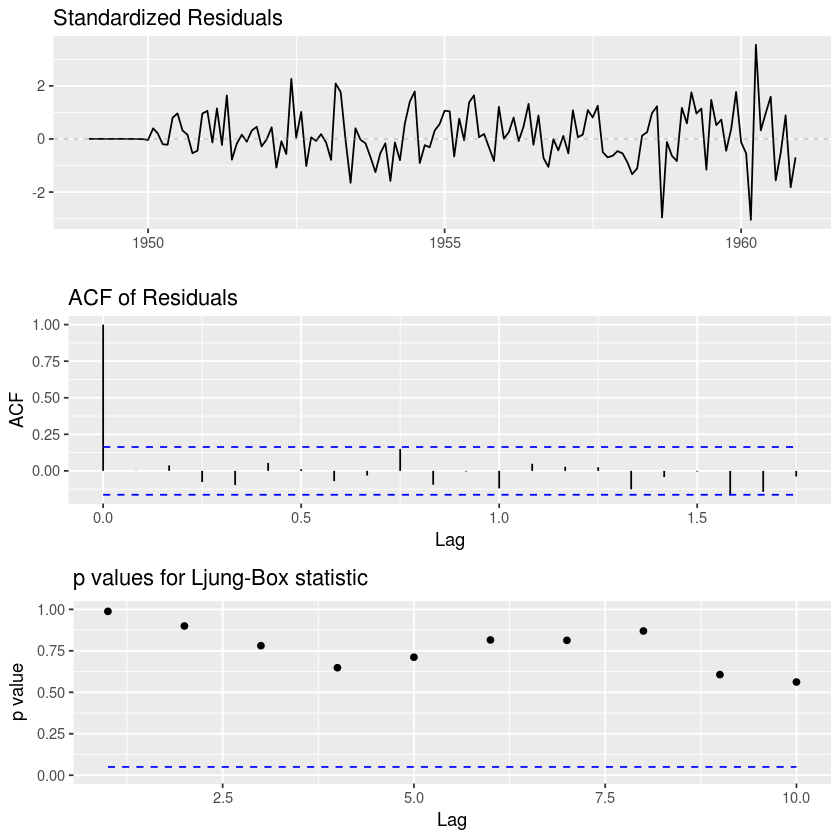

In [22]:
#Residuals plots
ggtsdiag(arimaAP)

The residual plots appear to be centered around 0 as noise, with no pattern. the arima model is a fairly good fit.

In [23]:
# predictive accuracy
accuracy(forecast(arimaAP))

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,1.342299,10.84619,7.86754,0.4206976,2.800458,0.245628,-0.001248475


         Point Forecast    Lo 95    Hi 95
Jan 1961       445.6349 423.0851 468.1847
Feb 1961       420.3950 393.9304 446.8596
Mar 1961       449.1983 419.4892 478.9074
Apr 1961       491.8399 460.0092 523.6707
May 1961       503.3945 469.9953 536.7937
Jun 1961       566.8625 532.3007 601.4242
Jul 1961       654.2602 618.8122 689.7081
Aug 1961       638.5975 602.4630 674.7320
Sep 1961       540.8837 504.2081 577.5594
Oct 1961       494.1266 457.0177 531.2356
Nov 1961       423.3327 385.8715 460.7940
Dec 1961       465.5076 427.7556 503.2596

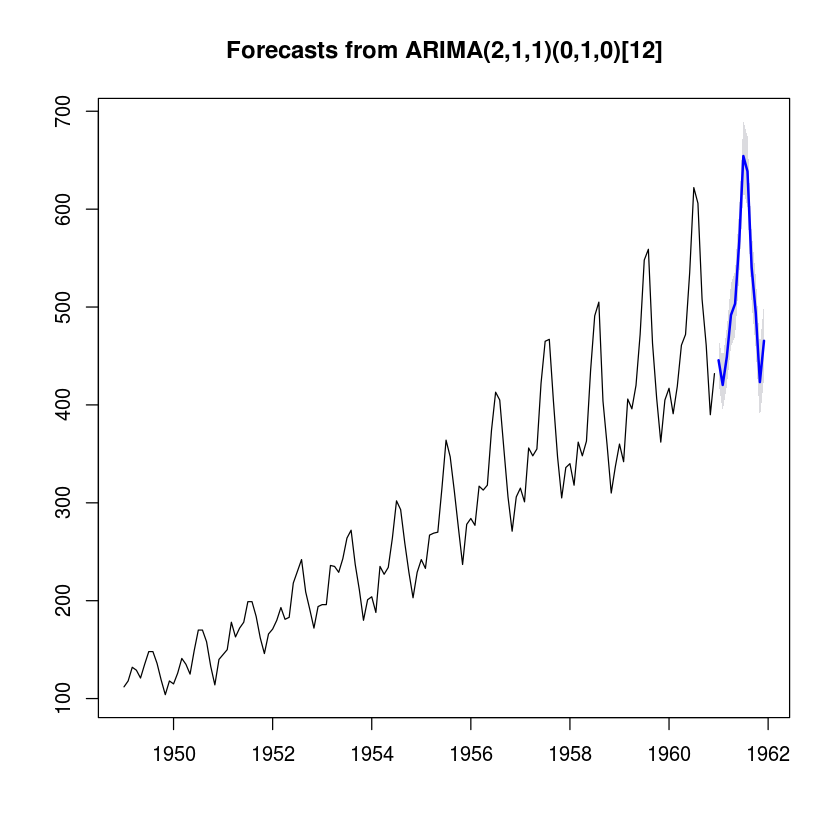

In [24]:
# predict next twelve future values using the forecast function, again from the forecast R package
forecast(arimaAP, level=c(95), h=12)
#plot a forecast of the time series with a 95% confidence interval where h is the forecast horizon periods in months.
plot(forecast(arimaAP, level=c(95), h=12)) 

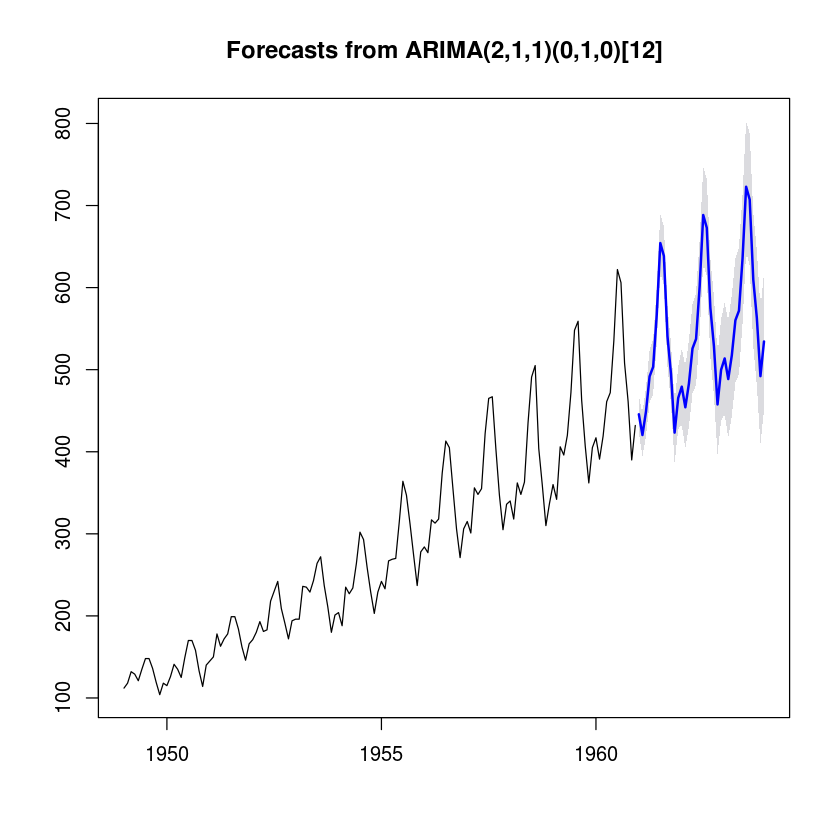

In [25]:
# predict next 36 future values
plot(forecast(arimaAP, level = c(95), h = 36))

To summarize, this has been an exercise in ARIMA modeling and using time series R packages ggfortify, tseries and forecast. It is a good basis to move on to more complicated time series datasets, models and comparisons in R.

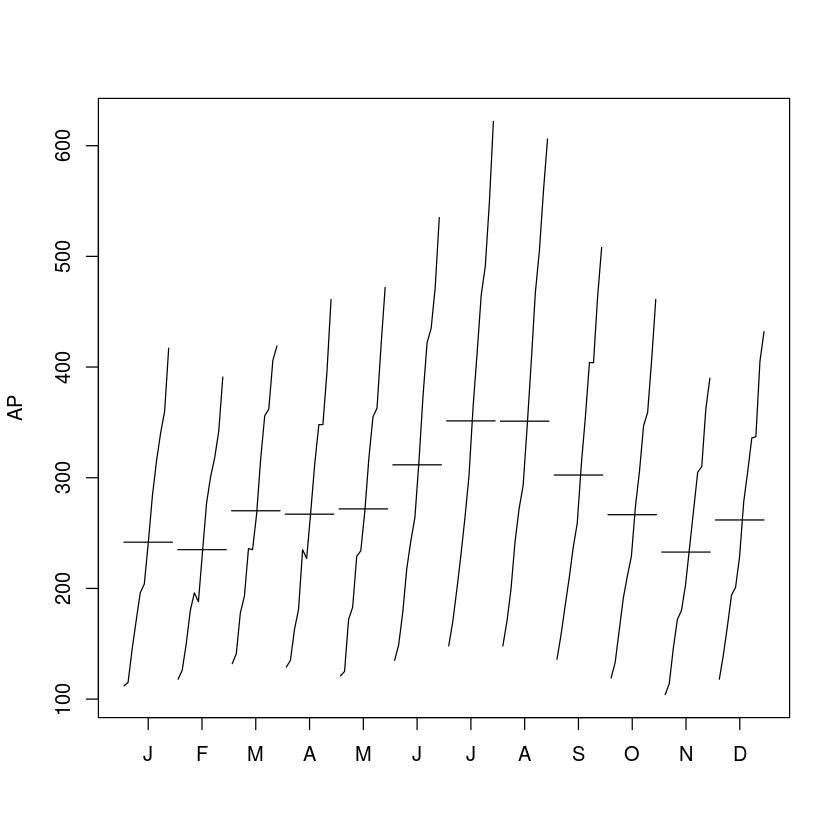

In [26]:
#additional plots: monthplot
monthplot(AP)

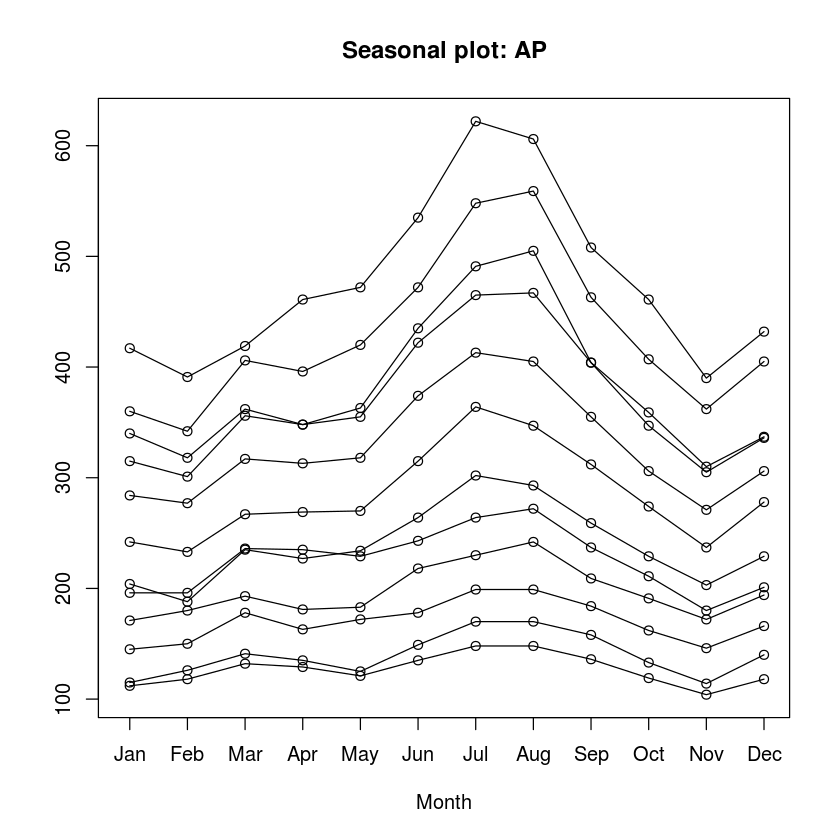

In [27]:
#additional plots: seasonplot
seasonplot(AP)

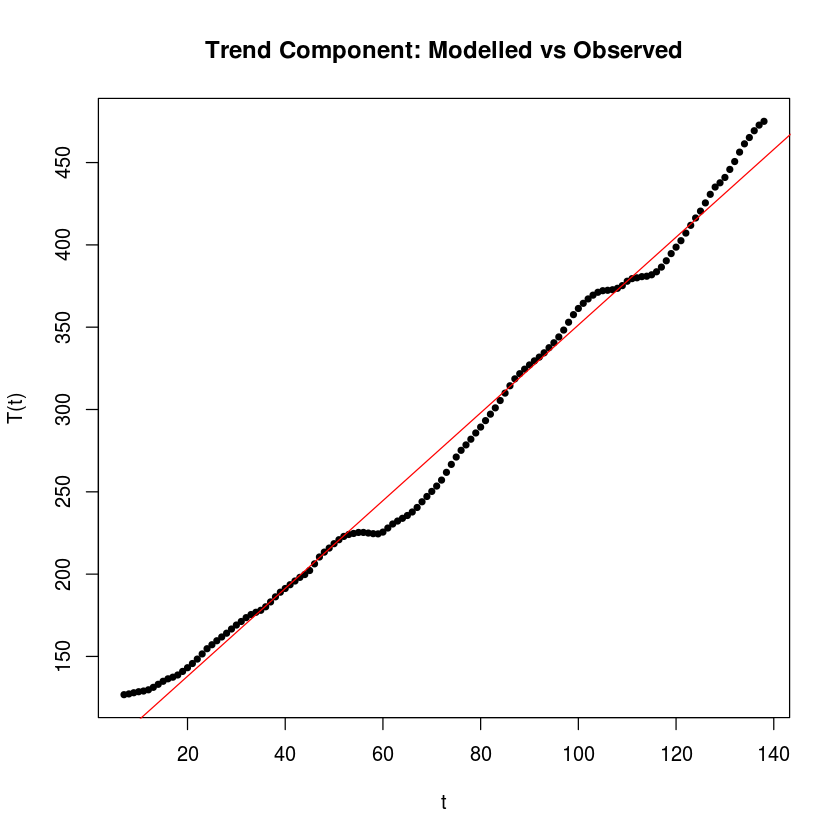

In [28]:
#Model Fitting
#The multiplicative model is: Y[t]=T[t]∗S[t]∗e[t]
#Y(t) is the number of passengers at time t,
#T(t) is the trend component at time t,
#S(t) is the seasonal component at time t,
#e(t) is the random error component at time t.

#Trend Component
#Inspecting the trend component in the decomposition plot suggests that the relationship is linear, thus fitting a linear model
t <- seq(1, 144, 1)
modelTrend <- lm(formula = AP.decompM$trend ~ t)
predT <- predict.lm(modelTrend, newdata = data.frame(t))

plot(AP.decompM$trend[7:138] ~ t[7:138], ylab="T(t)", xlab="t",
     type="p", pch=20, main = "Trend Component: Modelled vs Observed")
lines(predT, col="red")

This may not be the best model to fit as it doesn’t capture the seasonality and multiplicative effects over time.

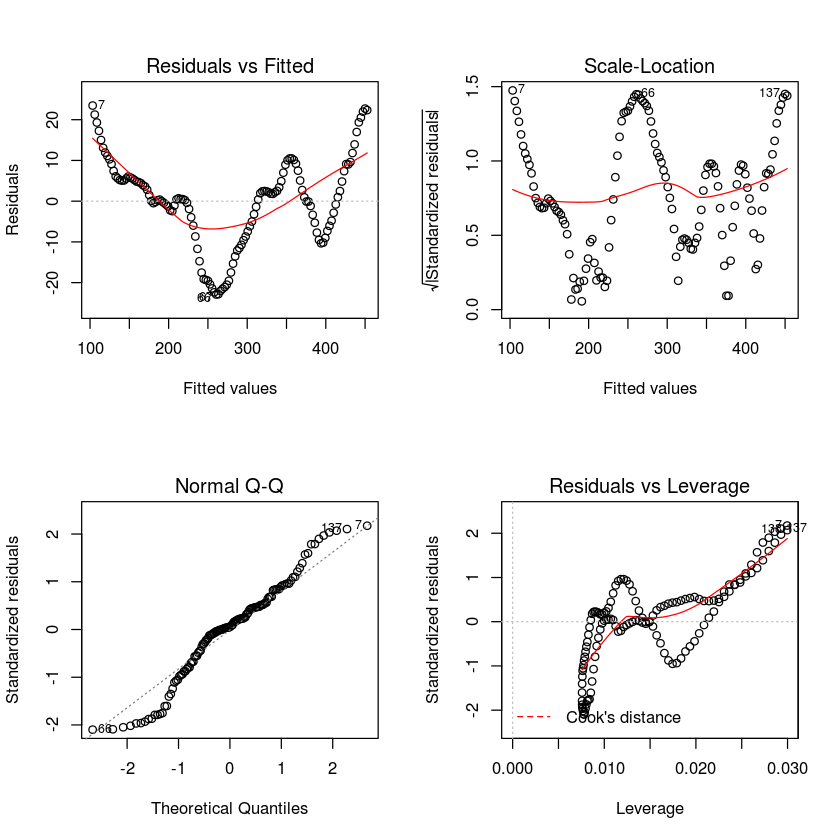

In [29]:
#linear model plots
layout(matrix(c(1,2,3,4),2,2))
plot(modelTrend)

In [30]:
#linear model summary
summary(modelTrend)


Call:
lm(formula = AP.decompM$trend ~ t)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.9162  -6.0845   0.6094   5.8658  23.4748 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 84.64827    2.05100   41.27   <2e-16 ***
t            2.66694    0.02504  106.50   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.96 on 130 degrees of freedom
  (12 observations deleted due to missingness)
Multiple R-squared:  0.9887,	Adjusted R-squared:  0.9886 
F-statistic: 1.134e+04 on 1 and 130 DF,  p-value: < 2.2e-16


In [31]:
#Therefore, the relationship between trend and time can be expressed as: T(t)=2.667t+84.648
#the trend component (T) for 1961 (month 145 to 156) can be predicted
Data1961 <- data.frame("T" = 2.667*seq(145, 156, 1) + 84.648, S=rep(0,12), e=rep(0,12),
                       row.names = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"))
Data1961

,T,S,e
Jan,471.363,0,0
Feb,474.030,0,0
Mar,476.697,0,0
Apr,479.364,0,0
May,482.031,0,0
Jun,484.698,0,0
Jul,487.365,0,0
Aug,490.032,0,0
Sep,492.699,0,0
Oct,495.366,0,0


In [32]:
#Seasonal Component
#Inspecting the seasonal (S) component of the decomposition
AP.decompM$seasonal

           Jan       Feb       Mar       Apr       May       Jun       Jul
1949 0.9102304 0.8836253 1.0073663 0.9759060 0.9813780 1.1127758 1.2265555
1950 0.9102304 0.8836253 1.0073663 0.9759060 0.9813780 1.1127758 1.2265555
1951 0.9102304 0.8836253 1.0073663 0.9759060 0.9813780 1.1127758 1.2265555
1952 0.9102304 0.8836253 1.0073663 0.9759060 0.9813780 1.1127758 1.2265555
1953 0.9102304 0.8836253 1.0073663 0.9759060 0.9813780 1.1127758 1.2265555
1954 0.9102304 0.8836253 1.0073663 0.9759060 0.9813780 1.1127758 1.2265555
1955 0.9102304 0.8836253 1.0073663 0.9759060 0.9813780 1.1127758 1.2265555
1956 0.9102304 0.8836253 1.0073663 0.9759060 0.9813780 1.1127758 1.2265555
1957 0.9102304 0.8836253 1.0073663 0.9759060 0.9813780 1.1127758 1.2265555
1958 0.9102304 0.8836253 1.0073663 0.9759060 0.9813780 1.1127758 1.2265555
1959 0.9102304 0.8836253 1.0073663 0.9759060 0.9813780 1.1127758 1.2265555
1960 0.9102304 0.8836253 1.0073663 0.9759060 0.9813780 1.1127758 1.2265555
           Aug       Sep 

In [33]:
#the seasonal (S) component to the year 1961
Data1961$S <- unique(AP.decompM$seasonal)
Data1961

,T,S,e
Jan,471.363,0.9102304,0
Feb,474.030,0.8836253,0
Mar,476.697,1.0073663,0
Apr,479.364,0.9759060,0
May,482.031,0.9813780,0
Jun,484.698,1.1127758,0
Jul,487.365,1.2265555,0
Aug,490.032,1.2199110,0
Sep,492.699,1.0604919,0
Oct,495.366,0.9217572,0


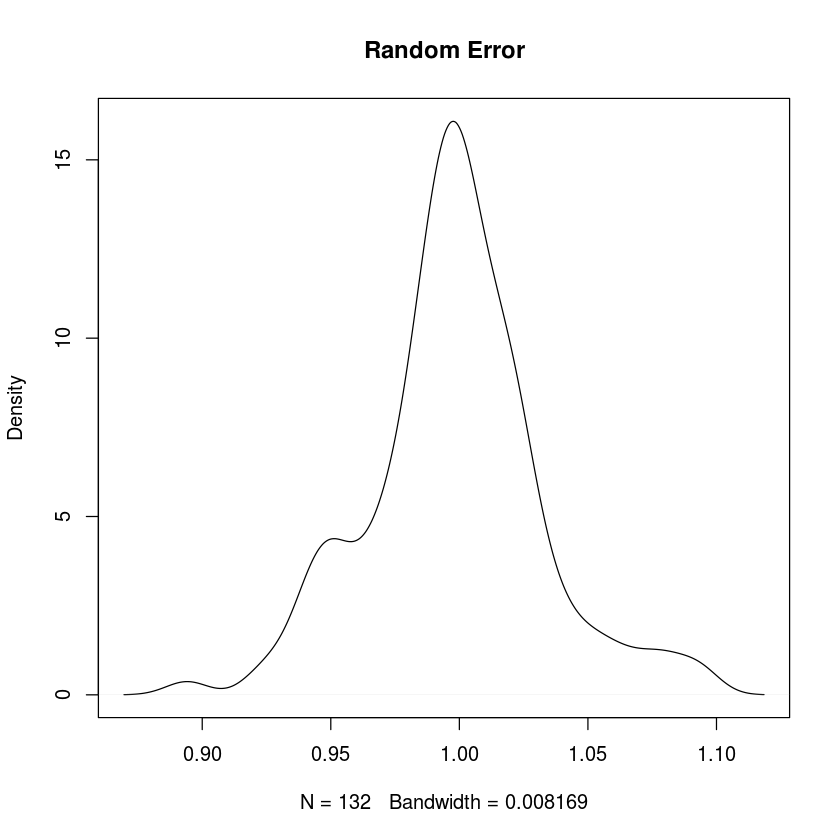

In [34]:
#Random Error Component
#Ploting the density estimation of the random error (e) component of the decomposition shows an approximate normal distribution
plot(density(AP.decompM$random[7:138]),
             main="Random Error") #Values 1:6 & 139:44 are NA

In [35]:
#mean of the random error
mean(AP.decompM$random[7:138])

[1] 0.9982357

In [36]:
#the decomposed dataset for 1961
Data1961$e <- 0.9982
Data1961

,T,S,e
Jan,471.363,0.9102304,0.9982
Feb,474.030,0.8836253,0.9982
Mar,476.697,1.0073663,0.9982
Apr,479.364,0.9759060,0.9982
May,482.031,0.9813780,0.9982
Jun,484.698,1.1127758,0.9982
Jul,487.365,1.2265555,0.9982
Aug,490.032,1.2199110,0.9982
Sep,492.699,1.0604919,0.9982
Oct,495.366,0.9217572,0.9982


In [37]:
#Predictions for the year 1961
#The multiplicative model is: Y[t]=T[t]∗S[t]∗e[t]
#3-point estimates (Realistic, Optimistic, Pessimistic) for the predictions
#simply the expected prediction (T∗S∗e), and 95% CI interval either way using the standard deviation of the random error (95% CI = 1.95∗sd)
sd_error <- sd(AP.decompM$random[7:138])
Data1961$R <- Data1961$T * Data1961$S * Data1961$e                  #Realistic Estimation
Data1961$O <- Data1961$T * Data1961$S * (Data1961$e+1.95*sd_error)  #Optimistic Estimation
Data1961$P <- Data1961$T * Data1961$S * (Data1961$e-1.95*sd_error)  #Pessimistic Estimation
Data1961

,T,S,e,R,O,P
Jan,471.363,0.9102304,0.9982,428.2766,456.2109,400.3424
Feb,474.030,0.8836253,0.9982,418.1110,445.3821,390.8398
Mar,476.697,1.0073663,0.9982,479.3441,510.6092,448.0790
Apr,479.364,0.9759060,0.9982,466.9721,497.4303,436.5140
May,482.031,0.9813780,0.9982,472.2031,503.0025,441.4038
Jun,484.698,1.1127758,0.9982,538.3894,573.5057,503.2730
Jul,487.365,1.2265555,0.9982,596.7042,635.6241,557.7843
Aug,490.032,1.2199110,0.9982,596.7194,635.6403,557.7985
Sep,492.699,1.0604919,0.9982,521.5628,555.5816,487.5440
Oct,495.366,0.9217572,0.9982,455.7853,485.5138,426.0568


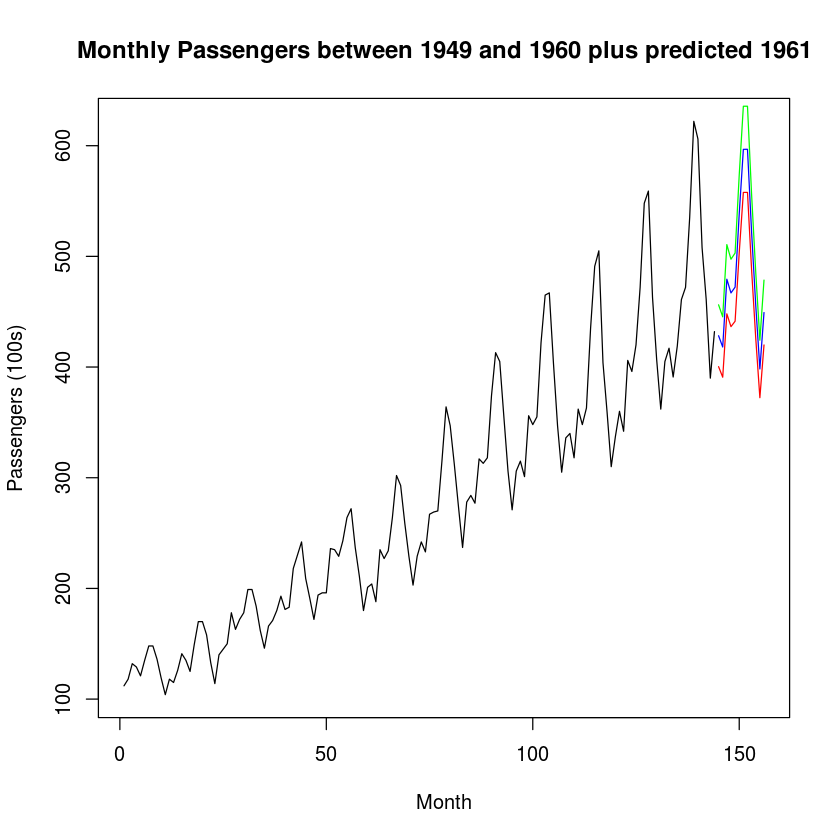

In [38]:
#plot for the predictions
xr = c(1,156)
plot(AP.decompM$x, xlim=xr, ylab = "Passengers (100s)", xlab = "Month", main="Monthly Passengers between 1949 and 1960 plus predicted 1961")
lines(data.frame(AP.decompM$x))
lines(Data1961$R, x=seq(145,156,1), col="blue")
lines(Data1961$O, x=seq(145,156,1), col="green")
lines(Data1961$P, x=seq(145,156,1), col="red")

In [39]:
#Exponential Models
# simple exponential - models level
fit <- HoltWinters(AP, beta=FALSE, gamma=FALSE)
fit

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = AP, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.9999339
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 431.9972

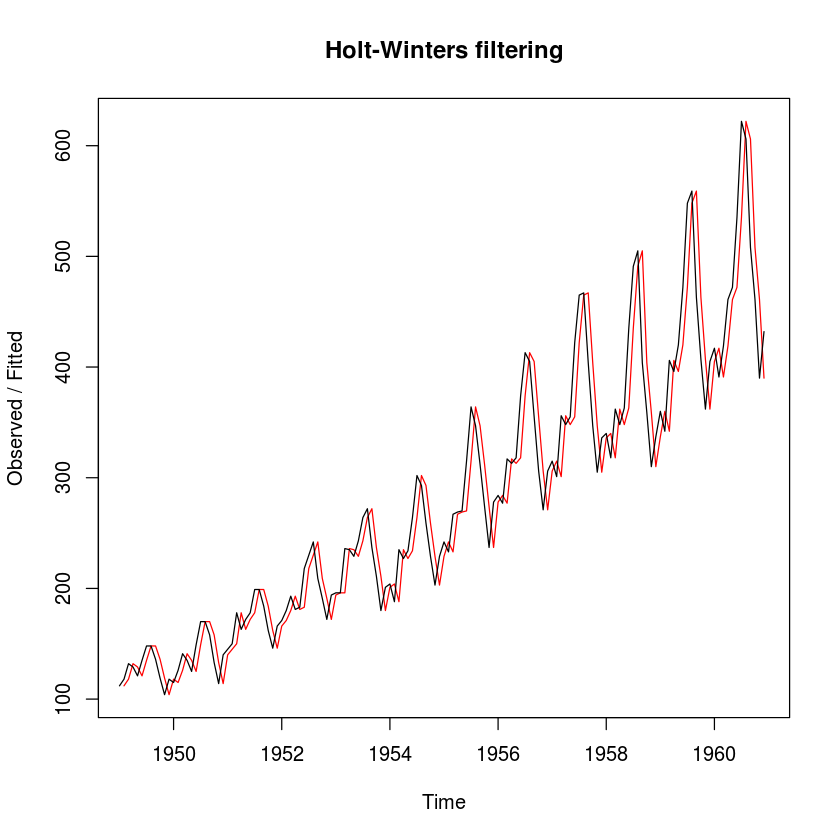

In [40]:
plot(fit)

In [41]:
# predictive accuracy
accuracy(forecast(fit))

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,2.237891,33.71109,25.86061,0.3783815,9.019603,0.8073795,0.3029018


In [42]:
# double exponential - models level and trend
fit <- HoltWinters(AP, gamma=FALSE)
fit

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = AP, gamma = FALSE)

Smoothing parameters:
 alpha: 1
 beta : 0.003218516
 gamma: FALSE

Coefficients:
        [,1]
a 432.000000
b   4.597605

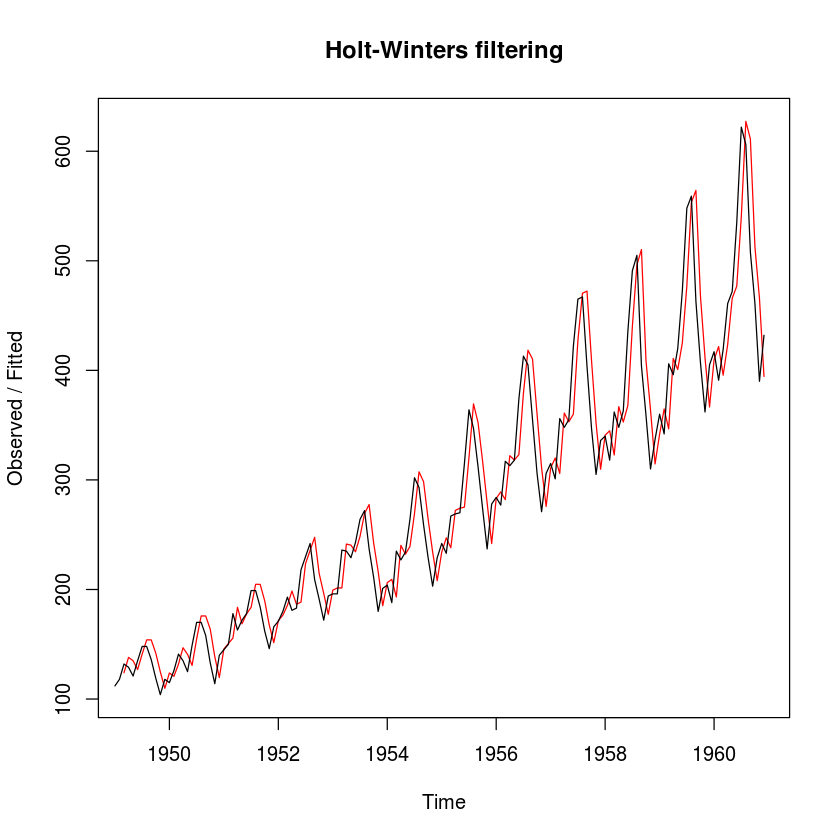

In [43]:
plot(fit)

In [44]:
# predictive accuracy
accuracy(forecast(fit))

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-3.0685,33.94632,25.93371,-1.958604,9.166852,0.8096618,0.3024913


In [45]:
# triple exponential - models level, trend, and seasonal components
fit <- HoltWinters(AP)
fit

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = AP)

Smoothing parameters:
 alpha: 0.2479595
 beta : 0.03453373
 gamma: 1

Coefficients:
          [,1]
a   477.827781
b     3.127627
s1  -27.457685
s2  -54.692464
s3  -20.174608
s4   12.919120
s5   18.873607
s6   75.294426
s7  152.888368
s8  134.613464
s9   33.778349
s10 -18.379060
s11 -87.772408
s12 -45.827781

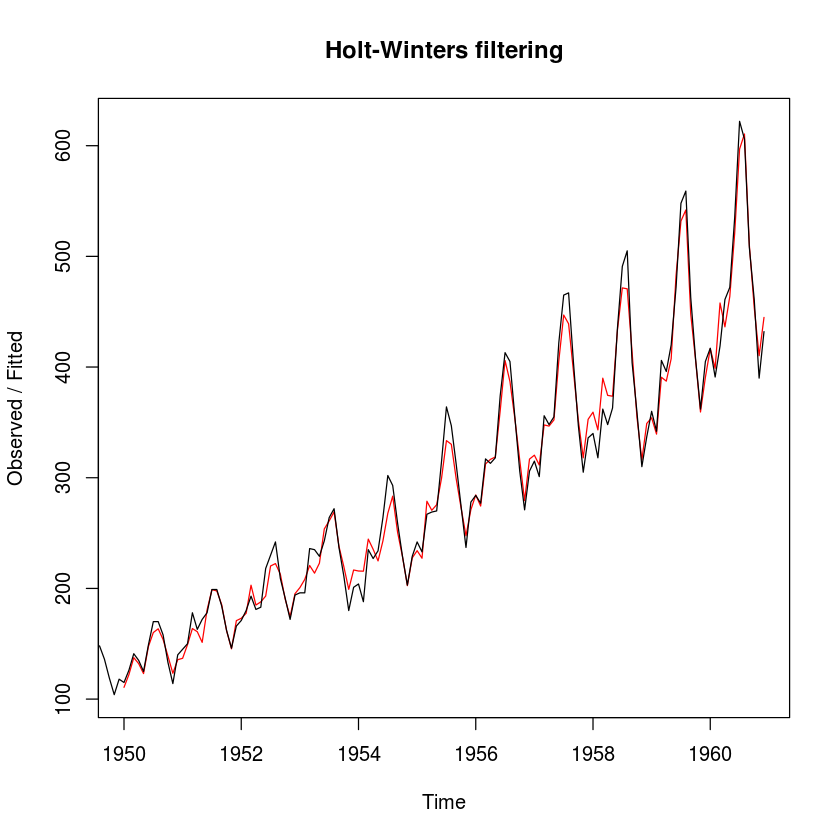

In [46]:
plot(fit)

In [30]:
# predictive accuracy
accuracy(forecast(fit))

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,1.753445,12.86886,9.774438,0.3992849,3.400129,0.3051622,0.424139


         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1961       453.4977 437.0972 469.8983 428.4153 478.5802
Feb 1961       429.3906 412.4590 446.3221 403.4960 455.2851
Mar 1961       467.0361 449.5553 484.5169 440.3015 493.7706
Apr 1961       503.2574 485.2097 521.3051 475.6558 530.8590
May 1961       512.3395 493.7078 530.9713 483.8447 540.8343
Jun 1961       571.8880 552.6556 591.1204 542.4746 601.3014
Jul 1961       652.6095 632.7605 672.4586 622.2530 682.9661
Aug 1961       637.4623 616.9809 657.9436 606.1387 668.7858
Sep 1961       539.7548 518.6260 560.8835 507.4412 572.0684
Oct 1961       490.7250 468.9342 512.5158 457.3988 524.0511
Nov 1961       424.4593 401.9922 446.9264 390.0988 458.8197
Dec 1961       469.5315 446.3742 492.6888 434.1155 504.9475

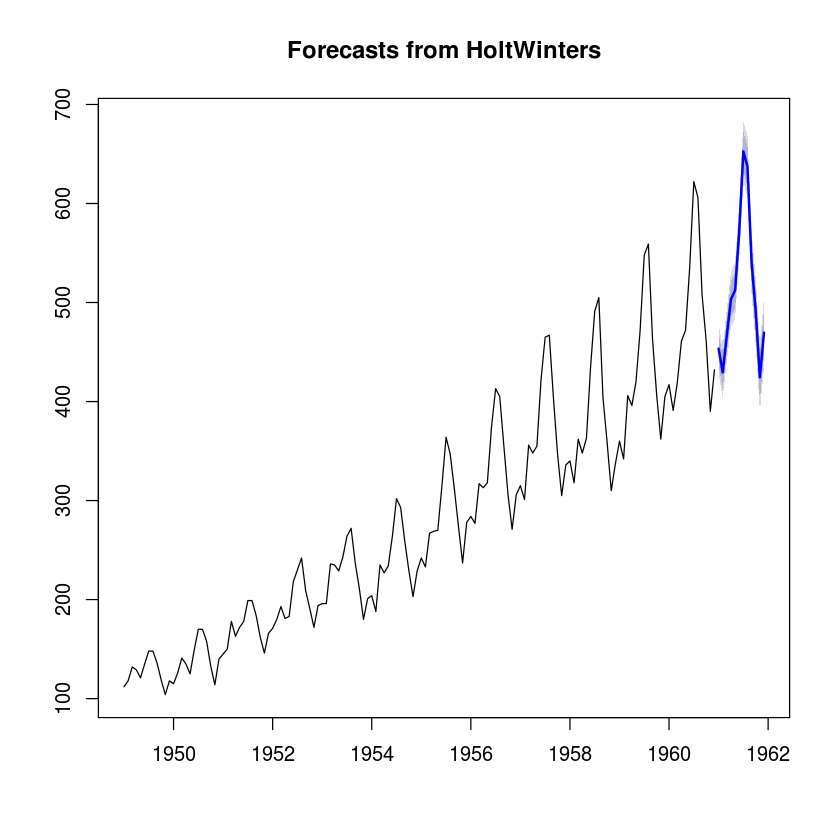

In [47]:
# predict next twelve future values
forecast(fit, 12)
plot(forecast(fit, 12)) 

In [48]:
library(forecast)
# Automated forecasting using an exponential model
fit <- ets(AP)
fit

ETS(M,Ad,M) 

Call:
 ets(y = AP) 

  Smoothing parameters:
    alpha = 0.7096 
    beta  = 0.0204 
    gamma = 1e-04 
    phi   = 0.98 

  Initial states:
    l = 120.9939 
    b = 1.7705 
    s=0.8944 0.7993 0.9217 1.0592 1.2203 1.2318
           1.1105 0.9786 0.9804 1.011 0.8869 0.9059

  sigma:  0.0392

     AIC     AICc      BIC 
1395.166 1400.638 1448.623 

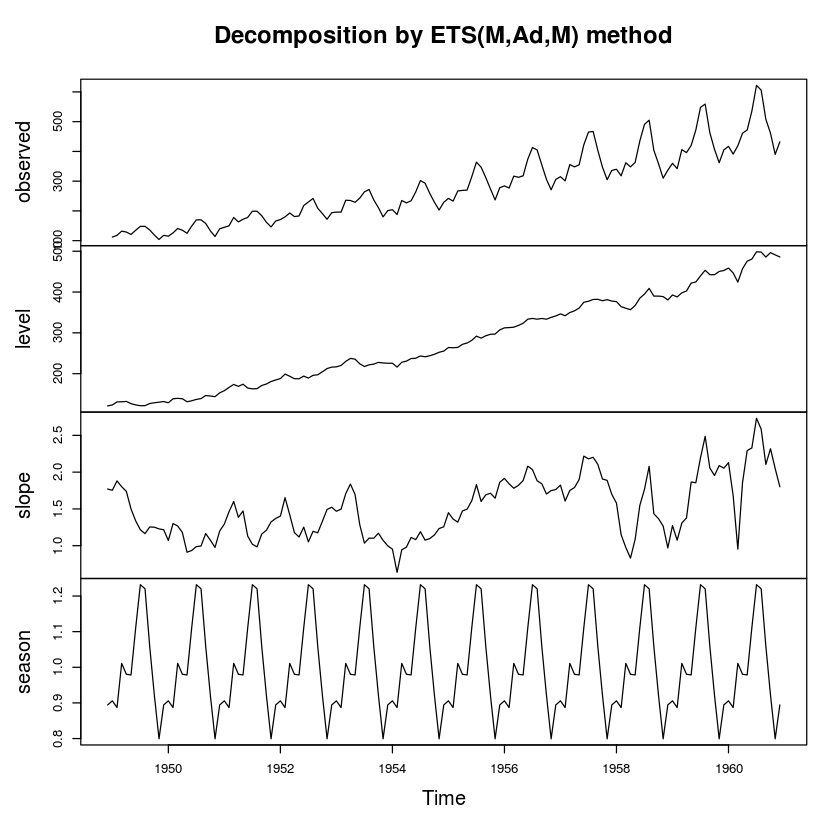

In [49]:
plot(fit)

In [50]:
# predictive accuracy
accuracy(forecast(fit))

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,1.567359,10.74726,7.791605,0.4357799,2.857917,0.2432573,0.03945056


         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1961       441.8018 419.6256 463.9780 407.8863 475.7174
Feb 1961       434.1186 407.1668 461.0704 392.8994 475.3379
Mar 1961       496.6300 460.6291 532.6310 441.5714 551.6887
Apr 1961       483.2375 443.6210 522.8539 422.6493 543.8256
May 1961       483.9914 440.0236 527.9591 416.7484 551.2343
Jun 1961       551.0244 496.3368 605.7120 467.3869 634.6619
Jul 1961       613.1797 547.3865 678.9728 512.5577 713.8016
Aug 1961       609.3648 539.2447 679.4850 502.1253 716.6044
Sep 1961       530.5408 465.4872 595.5944 431.0500 630.0317
Oct 1961       463.0332 402.8496 523.2168 370.9904 555.0761
Nov 1961       402.7478 347.4995 457.9961 318.2528 487.2428
Dec 1961       451.9694 386.7750 517.1638 352.2631 551.6756

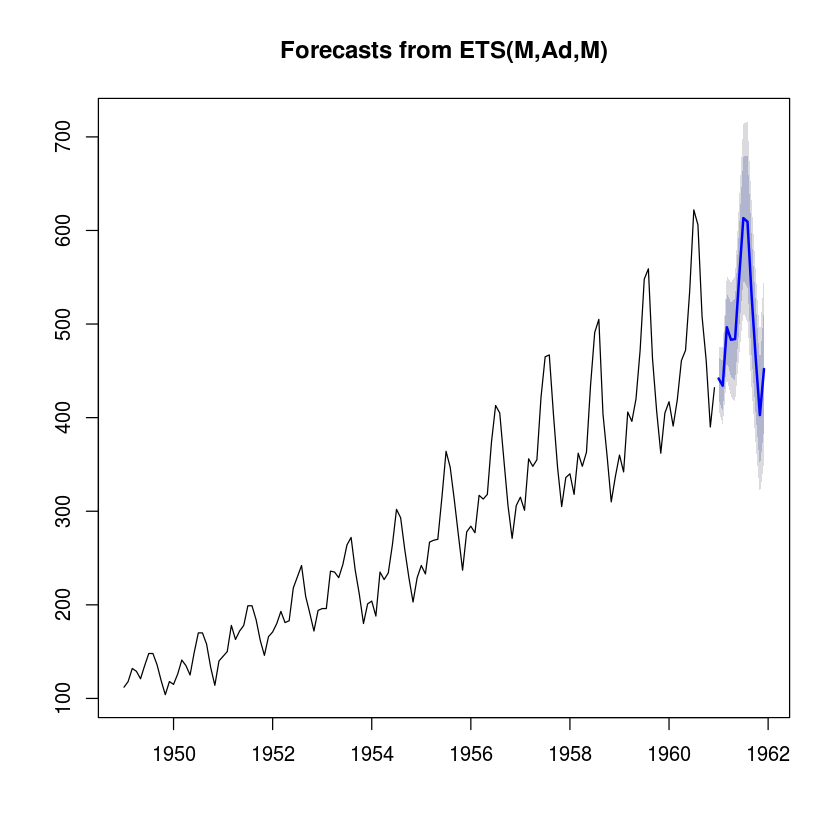

In [51]:
# predict next twelve future values
forecast(fit, 12)
plot(forecast(fit, 12)) 